# Modelo preditivo para análise de ações

 - O objetivo do trabalho é criar uma solução para montagem de carteira de ações, fazendo uma análise entre risco e retorno de ações listadas na bolsa de valores, combinando a análise fundamentalista com a análise técnica.
 - A predição será realizada utilizando dados históricos das cotações das ações com maior volume negociado na Bolsa de Valores, e seus respectivos  balanços patrimoniais e os demonstrativos de resultado do exercício (DRE).
 - Aplicarei o modelo de machine learning, estatística e algoritmos de Inteligência Artificial para mensurar quais características são as mais relevantes e que explicam as variáveis e ações mais importantes. 
 - Após obter as melhores ações, será aplicado um modelo de Sharpe Ratio que calcula o retorno esperado de uma carteira de investimentos ou ações individuais, mostrando as ações com menor risco e maior retorno.

### Criar Dicionários de Dataframes com cada empresa e baixar as libs

In [205]:
!pip3 install pycaret 2.3.3

ERROR: Could not find a version that satisfies the requirement 2.3.3 (from versions: none)
ERROR: No matching distribution found for 2.3.3


In [207]:
conda install -c conda-forge pycaret

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [4]:
!pip install shap

In [5]:
!pip install sklearn

In [6]:
import pandas as pd
from pycaret.classification 
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
import pycaret
import shap
#from pycaret.utils import enable_colab
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# Baixando empresas


empresas = ["ABEV3", "AZUL4", "BTOW3", "B3SA3", "BBSE3", "BRML3", "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRFS3", "BPAC11", "CRFB3", "CCRO3", "CMIG4", "HGTX3", "CIEL3", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CVCB3", "CYRE3", "ECOR3", "ELET6", "EMBR3", "ENBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "NTCO3", "HAPV3", "HYPE3", "IGTA3", "GNDI3", "ITSA4", "ITUB4", "JBSS3", "JHSF3", "KLBN11", "RENT3", "LCAM3", "LAME4", "LREN3", "MGLU3", "MRFG3", "BEEF3", "MRVE3", "MULT3", "PCAR3", "PETR4", "BRDT3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "SBSP3", "SANB11", "CSNA3", "SULA11", "SUZB3", "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VVAR3", "WEGE3", "YDUQ3"]
# fundamentos = {
#     "ABEV3": balanco_dre_abev3,
#     "MGLU3": balanco_dre_mglu3
# }
fundamentos = {}
arquivos = os.listdir("balancos")
for arquivo in arquivos:
    nome = arquivo[-9:-4]
    if "11" in nome:
        nome = arquivo[-10:-4]
    if nome in empresas:
        print(nome)
        # pegar o balanco daquela empresa
        balanco = pd.read_excel(f'balancos/{arquivo}', sheet_name=0)
        # na primeira coluna colocar o título com o nome da empresa
        balanco.iloc[0, 0] = nome
        # pegar 1ª linha e tornar um cabeçalho
        balanco.columns = balanco.iloc[0]
        balanco = balanco[1:]
        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        balanco = balanco.set_index(nome)
        dre = pd.read_excel(f'balancos/{arquivo}', sheet_name=1)
        # na primeira coluna colocar o título com o nome da empresa
        dre.iloc[0, 0] = nome
        # pegar 1ª linha e tornar um cabeçalho
        dre.columns = dre.iloc[0]
        dre = dre[1:]
        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        dre = dre.set_index(nome)
        fundamentos[nome] = balanco.append(dre)

ABEV3
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
AZUL4
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
B3SA3
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
BBAS3
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 

EQTL3
WARNING *** file size (64424) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64424) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
EZTC3
WARNING *** file size (64280) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64280) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
FLRY3
WARNING *** file size (64282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
GGBR4
WARNING *** file size (64256) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 b

WARNING *** file size (63832) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
SULA11
WARNING *** file size (64292) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64292) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
SUZB3
WARNING *** file size (64294) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64294) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TAEE11
WARNING *** file size (64280) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64280) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but S

### Pegar Preços das Ações nas Datas Equivalentes

In [212]:
cotacoes_df = pd.read_excel("Cotacoes.xlsx")
cotacoes = {}
for empresa in cotacoes_df["Empresa"].unique():
    cotacoes[empresa] = cotacoes_df.loc[cotacoes_df['Empresa']==empresa, :]

In [213]:
print(len(cotacoes))

77


### Remover empresas que tem cotações vazias da análise (mesmo após o tratamento que fizemos na hora de pegar as cotações)

In [214]:
for empresa in empresas:
    if cotacoes[empresa].isnull().values.any():
        cotacoes.pop(empresa)
        fundamentos.pop(empresa)
empresas = list(cotacoes.keys())
print(len(empresas))

65


### Mesclando fundamentos com o preço de fechamento de cada ação

In [215]:
# Criando dataframe


for empresa in fundamentos:
    tabela = fundamentos[empresa].T
    tabela.index = pd.to_datetime(tabela.index, format="%d/%m/%Y")
    tabela_cotacao = cotacoes[empresa].set_index("Date")
    tabela_cotacao = tabela_cotacao[["Adj Close"]]
    
    tabela = tabela.merge(tabela_cotacao, right_index=True, left_index=True)
    tabela.index.name = empresa
    fundamentos[empresa] = tabela
display(fundamentos["ABEV3"])

Ativo Total Ativo Circulante Caixa e Equivalentes de Caixa  \
ABEV3                                                                    
2020-12-31 125196574.72      35342614.53                   17090335.74   
2020-09-30 127056781.31      39098793.98                   21660450.82   
2020-06-30 121393004.54      36268126.21                   17438951.42   
2020-03-31 113687560.19      31086356.48                   13204471.81   
2019-12-31 101742944.26      27621136.38                   11900665.86   
2019-09-30 102475317.25      29004025.86                   15016913.92   
2019-06-30  98738978.82      27356035.07                   14233403.39   
2019-03-31  96905535.49      26194137.09                   12822524.93   
2018-12-31  94126137.34      25329604.61                   11463497.73   
2018-09-30  95691038.72      26200020.99                   12227668.99   
2018-06-30  90921361.41      26409115.65                   10619955.20   
2018-03-31  82378940.42      21560551.42                    7953477.12   
2017-12-31  86851993.60      24718071.81                   10354527.23   
2017-09-30  83020423.17      22230595.58                    8340687.87   
2017-06-30  84124008.45      23042848.77                    8757342.21   
2017-03-31  80733945.86      21297373.18                    7230261.25   
2016-12-31  83841417.22      23886852.10                    7876849.15   
2016-09-30  79110193.15      19990968.32                    7285216.77   
2016-06-30  76656713.73      18561515.52                    5729654.78   
2016-03-31  80248012.80      19074488.32                    6007322.11   
2015-12-31  90176233.47      28314488.83                   13620160.51   
2015-09-30  88043175.94      23835351.04                    9680857.09   
2015-06-30  74436157.44      18360256.51                    6899779.07   
2015-03-31     75101184      19241015.30                    6974584.83   
2014-12-31  72143200.26      20728420.35                    9722066.94   
2014-09-30  65125920.77      15446576.13                    5748115.97   
2014-06-30  62989045.76      15773268.99                    6273862.14   
2014-03-31  63297044.48      16352306.18                    7296176.13   
2013-12-31  68674015.23      20470011.90                   11285832.70   
2013-09-30  59618975.74      12478373.89                    4835169.79   
2013-06-30  58739269.63      12057052.16                    4482174.98   
2013-03-31   1340374.02            77552                         74204   
2012-12-31   1346301.06            71641                         48155   

           Aplicações Financeiras Contas a Receber   Estoques  \
ABEV3                                                           
2020-12-31             1700028.03       4303137.79 7605904.90   
2020-09-30             1442923.01       4156922.88 7341836.80   
2020-06-30                  44823       4201583.10 7771618.82   
2020-03-31                  44823       3394298.11 7752655.87   
2019-12-31                  14558       4495524.86 5978556.93   
2019-09-30                  14304       4236257.02 5978811.90   
2019-06-30                  14038       4103118.08 6197564.93   
2019-03-31                  13772       3980359.94 6032743.94   
2018-12-31                  13391       4879256.06 5401793.02   
2018-09-30                  13008       4285633.02 5349087.23   
2018-06-30                  12618       4412722.18 4933281.79   
2018-03-31                  12229       3537112.06 4725116.93   
2017-12-31                  11883       4944830.98 4318972.93   
2017-09-30                   7820       3767772.93 4373393.92   
2017-06-30                   8770       3572196.10 4663950.85   
2017-03-31                   9903       3267374.08 4510324.22   
2016-12-31              282771.01       4368058.88 4347052.03   
2016-09-30              274576.99       3793336.06 4275809.02   
2016-06-30              263892.99       3445761.02 4403950.08   
2016-03-31              209067.01       3146114.05 48960

### Tratar colunas
    
1. Vamos pegar apenas empresas que possuem as mesmas colunas
2. Ajeitando colunas com o mesmo nome ambiguo
3. Analisar valores vazios nas colunas

#### 1. Remover da análise tabelas que tem colunas diferentes

In [217]:
colunas = list(fundamentos["ABEV3"].columns)

for empresa in empresas:
    if set(colunas) != set(fundamentos[empresa].columns):
        fundamentos.pop(empresa)
print(len(fundamentos))

61


####  2. Ajeitando colunas com o mesmo nome ambiguo

In [218]:
texto_colunas = ";".join(colunas)

colunas_modificadas = []
for coluna in colunas:
    if colunas.count(coluna) == 2 and coluna not in colunas_modificadas:
        texto_colunas = texto_colunas.replace(";" + coluna + ";",";" + coluna + "_1;", 1)
        colunas_modificadas.append(coluna)
colunas = texto_colunas.split(';')
print(colunas)

['Ativo Total', 'Ativo Circulante', 'Caixa e Equivalentes de Caixa', 'Aplicações Financeiras', 'Contas a Receber_1', 'Estoques_1', 'Ativos Biológicos_1', 'Tributos a Recuperar', 'Despesas Antecipadas_1', 'Outros Ativos Circulantes', 'Ativo Realizável a Longo Prazo', 'Aplicações Financeiras Avaliadas a Valor Justo', 'Aplicações Financeiras Avaliadas ao Custo Amortizado', 'Contas a Receber', 'Estoques', 'Ativos Biológicos', 'Tributos Diferidos_1', 'Despesas Antecipadas', 'Créditos com Partes Relacionadas', 'Outros Ativos Não Circulantes', 'Investimentos', 'Imobilizado', 'Intangível', 'Diferido', 'Passivo Total', 'Passivo Circulante', 'Obrigações Sociais e Trabalhistas', 'Fornecedores', 'Obrigações Fiscais', 'Empréstimos e Financiamentos_1', 'Passivos com Partes Relacionadas_1', 'Dividendos e JCP a Pagar', 'Outros_1', 'Provisões_1', 'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados_1', 'Passivo Não Circulante', 'Empréstimos e Financiamentos', 'Passivos com Partes Relacionadas'

In [219]:
# implementar as colunas nas tabelas

for empresa in fundamentos:
    fundamentos[empresa].columns = colunas

#### 3. Analisar valores vazios nas colunas

In [220]:

valores_vazios = dict.fromkeys(colunas, 0)
total_linhas = 0
for empresa in fundamentos:
    tabela = fundamentos[empresa]
    total_linhas += tabela.shape[0]
    for coluna in colunas:
        qtde_vazios = pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna] += qtde_vazios
print(valores_vazios)
print(total_linhas)

{'Ativo Total': 0, 'Ativo Circulante': 0, 'Caixa e Equivalentes de Caixa': 0, 'Aplicações Financeiras': 0, 'Contas a Receber_1': 0, 'Estoques_1': 0, 'Ativos Biológicos_1': 0, 'Tributos a Recuperar': 0, 'Despesas Antecipadas_1': 0, 'Outros Ativos Circulantes': 0, 'Ativo Realizável a Longo Prazo': 0, 'Aplicações Financeiras Avaliadas a Valor Justo': 0, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 0, 'Contas a Receber': 0, 'Estoques': 0, 'Ativos Biológicos': 0, 'Tributos Diferidos_1': 0, 'Despesas Antecipadas': 0, 'Créditos com Partes Relacionadas': 0, 'Outros Ativos Não Circulantes': 0, 'Investimentos': 0, 'Imobilizado': 0, 'Intangível': 0, 'Diferido': 0, 'Passivo Total': 0, 'Passivo Circulante': 0, 'Obrigações Sociais e Trabalhistas': 0, 'Fornecedores': 0, 'Obrigações Fiscais': 0, 'Empréstimos e Financiamentos_1': 0, 'Passivos com Partes Relacionadas_1': 0, 'Dividendos e JCP a Pagar': 0, 'Outros_1': 0, 'Provisões_1': 0, 'Passivos sobre Ativos Não-Correntes a Venda e Descontin

In [221]:
remover_colunas = []
for coluna in valores_vazios:
    if valores_vazios[coluna] > 50:
        remover_colunas.append(coluna)

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1)
    fundamentos[empresa] = fundamentos[empresa].ffill()

In [222]:
fundamentos["ABEV3"].shape

(33, 72)

### Criando os rótulos: Comprar, Não Comprar ou Vender?

Queremos criar uma metodologia de compra (subiu mais do que o Ibov em 2%), neutro (subiu menos do que o Ibovespa até -2%) e venda (caiu em até -2% comparado ao Ibov)

Regra: 
1. Subiu mais do que o Ibovespa (ou caiu menos) -> Comprar (Valor = 2)
2. Subiu menos do que o Ibovespa até - 2% (ou caiu mais do que Ibovespa até Ibovespa -2%) -> Não Comprar (Valor = 1)
3. Subiu menos do que o Ibovespa - 2% (ou caiu mais do que Ibovespa -2%) -> Vender (Valor = 0)

###### Pegaremos os dados do Ibov do Investpy - do site Investing https://br.investing.com/

In [223]:
import pandas as pd
import numpy as np
import investpy

df_ibov = investpy.search_quotes(text= 'BVSP', 
                                 countries = ['brazil'])

In [224]:
for search_result in df_ibov[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [225]:
df_ibov = search_result.retrieve_historical_data(from_date = '20/12/2012', 
                                                  to_date= '20/04/2021')

df_ibov = df_ibov.rename(columns={"Close": "Adj Close"})

display(df_ibov)

Open      High       Low  Adj Close    Volume  Change Pct
Date                                                                     
2012-12-20  60992.00  61276.00  60622.00   61276.00   3083356        0.46
2012-12-21  61271.00  61271.00  60221.00   61007.00   3157488       -0.44
2012-12-26  61003.00  61322.00  60861.00   60960.00   2598017       -0.08
2012-12-27  60964.00  61191.00  60233.00   60416.00   2852593       -0.89
2012-12-28  60416.00  61066.00  60416.00   60952.00   2625971        0.89
...              ...       ...       ...        ...       ...         ...
2021-04-14 119298.00 120871.00 119298.00  120295.00  10076639        0.84
2021-04-15 120290.00 121409.00 120084.00  120701.00   7948059        0.34
2021-04-16 120701.00 121333.00 120199.00  121114.00   7945608        0.34
2021-04-19 121116.00 121974.00 120682.00  120934.00  10028085       -0.15
2021-04-20 120925.00 121354.00 119841.00  120062.00   7811501       -0.72

[2057 rows x 6 columns]

In [226]:
import numpy as np

datas = fundamentos["ABEV3"].index
for data in datas:
    if data not in df_ibov.index:
        df_ibov.loc[data] = np.nan
df_ibov = df_ibov.sort_index()
df_ibov = df_ibov.ffill()
df_ibov = df_ibov.rename(columns={"Adj Close": "IBOV"})
for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].merge(df_ibov[["IBOV"]], left_index=True, right_index=True)
display(fundamentos["ABEV3"])

Ativo Total  Ativo Circulante  Caixa e Equivalentes de Caixa  \
2020-12-31 125196574.72       35342614.53                    17090335.74   
2020-09-30 127056781.31       39098793.98                    21660450.82   
2020-06-30 121393004.54       36268126.21                    17438951.42   
2020-03-31 113687560.19       31086356.48                    13204471.81   
2019-12-31 101742944.26       27621136.38                    11900665.86   
2019-09-30 102475317.25       29004025.86                    15016913.92   
2019-06-30  98738978.82       27356035.07                    14233403.39   
2019-03-31  96905535.49       26194137.09                    12822524.93   
2018-12-31  94126137.34       25329604.61                    11463497.73   
2018-09-30  95691038.72       26200020.99                    12227668.99   
2018-06-30  90921361.41       26409115.65                    10619955.20   
2018-03-31  82378940.42       21560551.42                     7953477.12   
2017-12-31  86851993.60       24718071.81                    10354527.23   
2017-09-30  83020423.17       22230595.58                     8340687.87   
2017-06-30  84124008.45       23042848.77                     8757342.21   
2017-03-31  80733945.86       21297373.18                     7230261.25   
2016-12-31  83841417.22       23886852.10                     7876849.15   
2016-09-30  79110193.15       19990968.32                     7285216.77   
2016-06-30  76656713.73       18561515.52                     5729654.78   
2016-03-31  80248012.80       19074488.32                     6007322.11   
2015-12-31  90176233.47       28314488.83                    13620160.51   
2015-09-30  88043175.94       23835351.04                     9680857.09   
2015-06-30  74436157.44       18360256.51                     6899779.07   
2015-03-31  75101184.00       19241015.30                     6974584.83   
2014-12-31  72143200.26       20728420.35                     9722066.94   
2014-09-30  65125920.77       15446576.13                     5748115.97   
2014-06-30  62989045.76       15773268.99                     6273862.14   
2014-03-31  63297044.48       16352306.18                     7296176.13   
2013-12-31  68674015.23       20470011.90                    11285832.70   
2013-09-30  59618975.74       12478373.89                     4835169.79   
2013-06-30  58739269.63       12057052.16                     4482174.98   
2013-03-31   1340374.02          77552.00                       74204.00   
2012-12-31   1346301.06          71641.00                       48155.00   

            Aplicações Financeiras  Contas a Receber_1  Estoques_1  \
2020-12-31              1700028.03          4303137.79  7605904.90   
2020-09-30              1442923.01          4156922.88  7341836.80   
2020-06-30                44823.00          4201583.10  7771618.82   
2020-03-31                44823.00          3394298.11  7752655.87   
2019-12-31                14558.00          4495524.86  5978556.93   
2019-09-30                14304.00          4236257.02  5978811.90   
2019-06-30                14038.00          4103118.08  6197564.93   
2019-03-31                13772.00          3980359.94  6032743.94   
2018-12-31                13391.00          4879256.06  5401793.02   
2018-09-30                13008.00          4285633.02  5349087.23   
2018-06-30                12618.00          4412722.18  4933281.79   
2018-03-31                12229.00          3537112.06  4725116.93   
2017-12-31                11883.00          4944830.98  4318972.93   
2017-09-30                 7820.00          3767772.93  4373393.92   
2017-06-30                 8770.00          3572196.10  4663950.85   
2017-03-31                 9903.00          3267374.08  4510324.22   
2016-12-31               282771.01          4368058.88  4347052.03   
2016-09-30               274576.99          3793336.06  4275809.02   
2016-06-30               263892.99          3445761.02  4403950.08   
2016-03-31               20

# Análise Exploratória

- Fiz uma análise exploratória/EDA com algumas empresas para entender como se comportam, fatores que mais impactam e padrões caso existam.

In [95]:
fundamentos["JBSS3"].info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-09-30 to 2012-12-31
Freq: -1Q-DEC
Data columns (total 73 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Ativo Total                                                     32 non-null     float64
 1   Ativo Circulante                                                32 non-null     float64
 2   Caixa e Equivalentes de Caixa                                   32 non-null     float64
 3   Aplicações Financeiras                                          32 non-null     float64
 4   Contas a Receber_1                                              32 non-null     float64
 5   Estoques_1                                                      32 non-null     float64
 6   Ativos Biológicos_1                                             32 non-null     float64
 7   Tributos a Recuperar 

In [227]:
pd.set_option('float_format','{:.0f}'.format)
fundamentos["JBSS3"].describe()

Ativo Total  Ativo Circulante  Caixa e Equivalentes de Caixa  \
count           32                32                             32   
mean     102941752          38014746                        6459069   
std       29266133          10656764                        3623757   
min       49756193          19383400                        1949230   
25%       81255602          33732519                        4141233   
50%      108257079          36502546                        5876284   
75%      118064007          40051914                        7581360   
max      166492766          63978750                       18707649   

       Aplicações Financeiras  Contas a Receber_1  Estoques_1  \
count                      32                  32          32   
mean                  5435277             9645094    10565859   
std                   2661106             1962957     3263831   
min                   2850074             5688648     5182187   
25%                   3738474             8886788     8556269   
50%                   4951122             9438523    10190693   
75%                   5879258            10040795    12134228   
max                  16401000            13615755    18883975   

       Ativos Biológicos_1  Tributos a Recuperar  Despesas Antecipadas_1  \
count                   32                    32                      32   
mean               2579893               2049901                   86162   
std                1045603                686445                  115224   
min                 849624                950761                       0   
25%                1586989               1677410                       0   
50%                2672888               2009457                       0   
75%                3185329               2449112                  166676   
max                4998609               3715767                  364786   

       Outros Ativos Circulantes  ...  Resultado da Equivalência Patrimonial  \
count                         32  ...                                     32   
mean                     1193492  ...                                   7146   
std                       609717  ...                                   8121   
min                       460625  ...                                 -21422   
25%                       759752  ...                                   4326   
50%                      1092025  ...                                   6938   
75%                      1535477  ...                                   9177   
max                      3259758  ...                                  24399   

       Financeiras  Receitas Financeiras  Despesas Financeiras  \
count           32                    32                    32   
mean      -1476673                893216              -2369889   
std        2005671               3368162               3229455   
min       -9087383              -9223329             -12075224   
25%       -1937248                 98659              -2457736   
50%        -959208                479543              -1835794   
75%        -635865               1129576              -1314921   
max        2652592              14727816               7486711   

       Resultado Antes Tributação/Participações  \
count                                        32   
mean                                     766846   
std                                     2302649   
min                                    -6786194   
25%                                      316748   
50%                                      504787   
75%                                     1480362   
max                                     5538491   

       Provisão para IR e Contribuição Social  IR Diferido  \
count                                      32           32   
mean                                  -301871        89878   
std                                    517479       812915   
min                                  -1595894     -2094823   
25%       

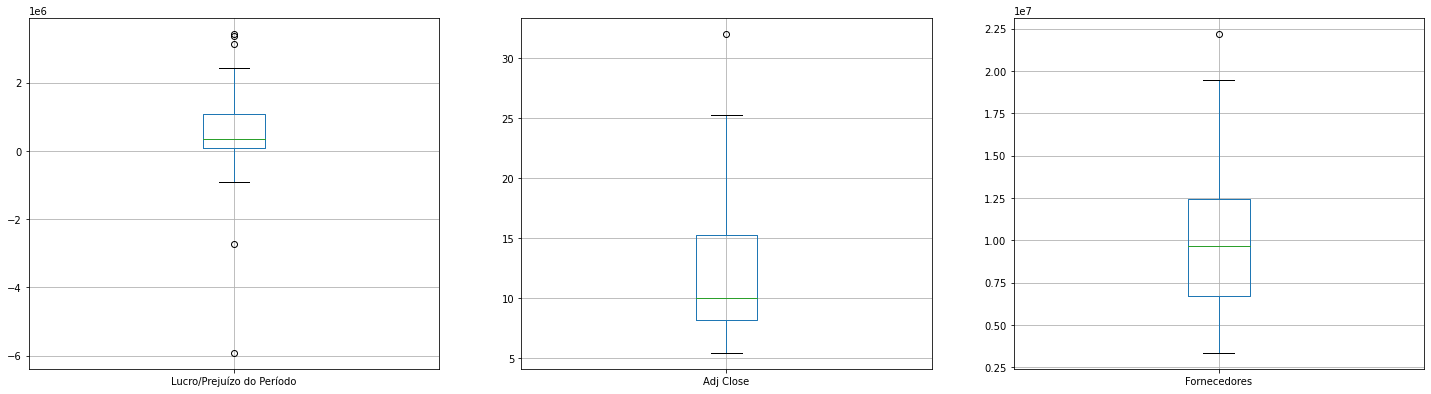

In [228]:
#boxplot
plt.subplots(figsize=(25, 22))

plt.subplot(3, 3, 1)
boxplot = fundamentos["JBSS3"].boxplot(column=['Lucro/Prejuízo do Período'])

plt.subplot(3, 3, 2)
boxplot = fundamentos["JBSS3"].boxplot(column=['Adj Close'])

plt.subplot(3, 3, 3)
boxplot = fundamentos["JBSS3"].boxplot(column=['Fornecedores'])

In [229]:
fig = px.scatter(fundamentos["JBSS3"], x = "Adj Close", y = "Lucro/Prejuízo do Período", size = "IBOV", 
            log_x = False, size_max = 40, width = 800)
fig.update_layout(title = 'Adj Close X Lucro/Prejuízo do Período x IBOV')
fig.update_xaxes(title = 'Adj Close')
fig.update_yaxes(title = 'Lucro/Prejuízo do Período')
fig.show()

# Podemos notar que o Lucro/Prejuízo do Período x Adj Close possuem uma correlação positiva

In [232]:
fig = px.scatter(fundamentos["JBSS3"], x = "Adj Close", y = "Fornecedores", size = "IBOV", 
            log_x = False, size_max = 40, width = 800)
fig.update_layout(title = 'Adj Close X Fornecedores x IBOV')
fig.update_xaxes(title = 'Adj Close')
fig.update_yaxes(title = 'Fornecedores')
fig.show()

# Mas neste caso, notamos que no DRE a linha de Fornecedores é a que mais impacta no Adj. Close da ação.

In [24]:
stats = pd.DataFrame()

stats["mean"] = fundamentos["JBSS3"].mean()
stats["Std.Dev"] = fundamentos["JBSS3"].std()
stats["Var"] = fundamentos["JBSS3"].var()

stats

mean       Std.Dev  \
Ativo Total                             1.029418e+08  2.926613e+07   
Ativo Circulante                        3.801475e+07  1.065676e+07   
Caixa e Equivalentes de Caixa           6.459069e+06  3.623757e+06   
Aplicações Financeiras                  5.435277e+06  2.661106e+06   
Contas a Receber_1                      9.645094e+06  1.962957e+06   
...                                              ...           ...   
Provisão para IR e Contribuição Social -3.018706e+05  5.174787e+05   
IR Diferido                             8.987753e+04  8.129150e+05   
Lucro/Prejuízo do Período               4.766251e+05  1.705327e+06   
Adj Close                               1.219563e+01  6.286243e+00   
IBOV                                    6.789116e+04  2.005987e+04   

                                                 Var  
Ativo Total                             8.565065e+14  
Ativo Circulante                        1.135666e+14  
Caixa e Equivalentes de Caixa           1.313161e+13  
Aplicações Financeiras                  7.081484e+12  
Contas a Receber_1                      3.853201e+12  
...                                              ...  
Provisão para IR e Contribuição Social  2.677842e+11  
IR Diferido                             6.608307e+11  
Lucro/Prejuízo do Período               2.908141e+12  
Adj Close                               3.951685e+01  
IBOV                                    4.023984e+08  

[73 rows x 3 columns]

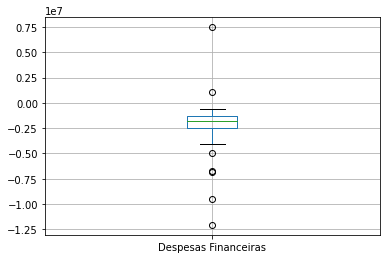

In [25]:
#sns.regplot(x=y_train, y=lucro_previsto);

boxplot = fundamentos["JBSS3"].boxplot(column=['Despesas Financeiras'])

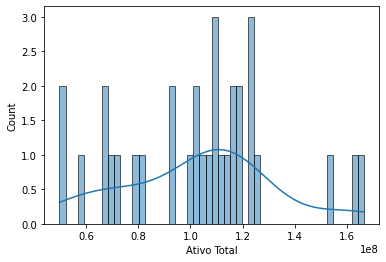

In [26]:
import seaborn as sns


sns.histplot(data=fundamentos["JBSS3"], x="Ativo Total",bins=50, kde=True);

In [239]:
!pip3 install dataprep

  Using cached dataprep-0.4.1-py3-none-any.whl (3.5 MB)
  Using cached usaddress-0.5.10-py2.py3-none-any.whl (63 kB)
  Using cached Metaphone-0.6-py3-none-any.whl
  Using cached Flask-1.1.4-py2.py3-none-any.whl (94 kB)
  Using cached pydantic-1.9.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached dask-2.30.0-py3-none-any.whl (848 kB)
  Using cached levenshtein-0.12.0-cp39-cp39-win_amd64.whl (82 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)
  Using cached aiohttp-3.8.1-cp39-cp39-win_amd64.whl (554 kB)
  Using cached jsonpath_ng-1.5.3-py3-none-any.whl (29 kB)
  Using cached python_stdnum-1.17-py2.py3-none-any.whl (943 kB)
  Using cached varname-0.8.1-py3-none-any.whl (20 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached nltk-3.6.7-py3-none-any.whl (1.5 MB)
  Using cached nltk-3.6.6-py3-none-any.whl (1.5 MB)
  Using cached nltk-3.6.3-p

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Homero\Anaconda\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Homero\\AppData\\Local\\Temp\\pip-install-kjo2ge25\\python-crfsuite_b7c1e1b48395447794a097d3cacf850f\\setup.py'"'"'; __file__='"'"'C:\\Users\\Homero\\AppData\\Local\\Temp\\pip-install-kjo2ge25\\python-crfsuite_b7c1e1b48395447794a097d3cacf850f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Homero\AppData\Local\Temp\pip-wheel-vsmk8ni5'
       cwd: C:\Users\Homero\AppData\Local\Temp\pip-install-kjo2ge25\python-crfsuite_b7c1e1b48395447794a097d3cacf850f\
  Complete output (12 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating b

In [240]:
from dataprep.eda import create_report
from dataprep.eda import plot_correlation

ModuleNotFoundError: No module named 'dataprep'

In [235]:
from dataprep.eda import create_report

create_report(fundamentos["JBSS3"])

ModuleNotFoundError: No module named 'dataprep'


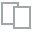
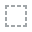
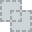
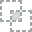
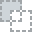
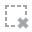
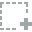
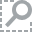
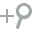
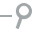
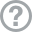
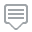
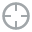
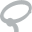
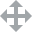
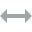
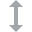
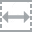
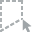
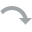
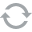
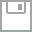
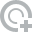
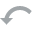
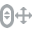
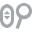
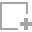
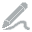
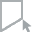
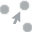
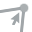
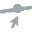

In [24]:
from dataprep.eda import plot_correlation
plot_correlation(fundamentos["JBSS3"])

In [241]:
pd.set_option('float_format','{:.2f}'.format)

correlacao_pos = fundamentos["JBSS3"].corr().unstack()
correlacao_pos = correlacao_pos[correlacao_pos>0.5]
correlacao_pos

Ativo Total  Ativo Total                               1.00
             Ativo Circulante                          0.90
             Caixa e Equivalentes de Caixa             0.65
             Contas a Receber_1                        0.84
             Estoques_1                                0.97
                                                       ... 
IBOV         Receita Líquida de Vendas e/ou Serviços   0.68
             Resultado Bruto                           0.70
             Outras Receitas Operacionais              0.52
             Adj Close                                 0.70
             IBOV                                      1.00
Length: 924, dtype: float64

In [25]:
pd.set_option('float_format','{:.2f}'.format)

correlacao_pos = fundamentos["JBSS3"].corr().unstack()
correlacao_pos = correlacao_pos[correlacao_pos<-0.7]
correlacao_pos

Ativo Total                                    Reservas de Reavaliação                         -0.89
                                               Custo de Bens e/ou Serviços Vendidos            -0.98
                                               Despesas Com Vendas                             -0.96
Ativo Circulante                               Custo de Bens e/ou Serviços Vendidos            -0.84
                                               Despesas Com Vendas                             -0.83
Contas a Receber_1                             Custo de Bens e/ou Serviços Vendidos            -0.79
                                               Despesas Com Vendas                             -0.80
Estoques_1                                     Reservas de Reavaliação                         -0.88
                                               Custo de Bens e/ou Serviços Vendidos            -0.95
                                               Despesas Com Vendas                         

In [102]:
# Transformando os indicadores em percentuais
# Fundamento%trimestre = fundamento trimestre atual / fundamento tri anterior
# Cotacao%tri = Cotacao trimestre seguinte / cotacao trimestre

for empresa in fundamentos:
    fundamento = fundamentos[empresa]
    fundamento = fundamento.sort_index()
    for coluna in fundamento:
        if "Adj Close" in coluna or "IBOV" in coluna:
            pass
        else:
            # Pegando a cotação anterior
            condicoes = [
                (fundamento[coluna].shift(1) > 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] > 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] > 0),
                (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] == 0),
            ]
            valores = [
                -1,
                1,
                (abs(fundamento[coluna].shift(1)) - abs(fundamento[coluna])) / abs(fundamento[coluna].shift(1)),
                1,
                -1,
                1,
            ]
            fundamento[coluna] = np.select(condicoes, valores, default=fundamento[coluna] / fundamento[coluna].shift(1) - 1)
    # Pegando a cotação seguinte
    fundamento["Adj Close"] = fundamento["Adj Close"].shift(-1) / fundamento["Adj Close"] - 1
    fundamento["IBOV"] = fundamento["IBOV"].shift(-1) / fundamento["IBOV"] - 1
    fundamento["Resultado"] = fundamento["Adj Close"] - fundamento["IBOV"]
    condicoes = [
        (fundamento["Resultado"] > 0),
        (fundamento["Resultado"] < 0) & (fundamento["Resultado"] >= -0.02),
        (fundamento["Resultado"] < -0.02)
    ]
    valores = [2, 1, 0]
    fundamento["Decisao"] = np.select(condicoes, valores)
    
    fundamentos[empresa] = fundamento
display(fundamentos["ABEV3"])

Ativo Total  Ativo Circulante  Caixa e Equivalentes de Caixa  \
2012-12-31          NaN               NaN                            NaN   
2013-03-31           -0                 0                              1   
2013-06-30           43               154                             59   
2013-09-30            0                 0                              0   
2013-12-31            0                 1                              1   
2014-03-31           -0                -0                             -0   
2014-06-30           -0                -0                             -0   
2014-09-30            0                -0                             -0   
2014-12-31            0                 0                              1   
2015-03-31            0                -0                             -0   
2015-06-30           -0                -0                             -0   
2015-09-30            0                 0                              0   
2015-12-31            0                 0                              0   
2016-03-31           -0                -0                             -1   
2016-06-30           -0                -0                             -0   
2016-09-30            0                 0                              0   
2016-12-31            0                 0                              0   
2017-03-31           -0                -0                             -0   
2017-06-30            0                 0                              0   
2017-09-30           -0                -0                             -0   
2017-12-31            0                 0                              0   
2018-03-31           -0                -0                             -0   
2018-06-30            0                 0                              0   
2018-09-30            0                -0                              0   
2018-12-31           -0                -0                             -0   
2019-03-31            0                 0                              0   
2019-06-30            0                 0                              0   
2019-09-30            0                 0                              0   
2019-12-31           -0                -0                             -0   
2020-03-31            0                 0                              0   
2020-06-30            0                 0                              0   
2020-09-30            0                 0                              0   
2020-12-31           -0                -0                             -0   

            Aplicações Financeiras  Contas a Receber_1  Estoques_1  \
2012-12-31                     NaN                 NaN         NaN   
2013-03-31                     NaN                  -1         NaN   
2013-06-30                       1                 895           1   
2013-09-30                       0                  -0          -0   
2013-12-31                      -1                   0           0   
2014-03-31                       0                  -0           0   
2014-06-30                      -0                   0           0   
2014-09-30                       0                  -0           0   
2014-12-31                       0                  -0           0   
2015-03-31                       0                  -0           0   
2015-06-30                      -0                  -0          -0   
2015-09-30                      -0                   0           0   
2015-12-31                      -1                   0          -0   
2016-03-31                      -0                  -0           0   
2016-06-30                       0                   0          -0   
2016-09-30                       0                   0          -0   
2016-12-31                       0                   0           0   
2017-03-31                      -1                  -0           0   
2017-06-30                      -0                   0           0   
2017-09-30                 

In [103]:
# Retirando valores vazios
colunas = list(fundamentos["ABEV3"].columns)
valores_vazios = dict.fromkeys(colunas, 0)
total_linhas = 0
for empresa in fundamentos:
    tabela = fundamentos[empresa]
    total_linhas += tabela.shape[0]
    for coluna in colunas:
        qtde_vazios = pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna] += qtde_vazios
print(valores_vazios)
print(total_linhas)

{'Ativo Total': 61, 'Ativo Circulante': 61, 'Caixa e Equivalentes de Caixa': 61, 'Aplicações Financeiras': 623, 'Contas a Receber_1': 65, 'Estoques_1': 483, 'Ativos Biológicos_1': 1874, 'Tributos a Recuperar': 266, 'Despesas Antecipadas_1': 1059, 'Outros Ativos Circulantes': 281, 'Ativo Realizável a Longo Prazo': 61, 'Aplicações Financeiras Avaliadas a Valor Justo': 1581, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 1661, 'Contas a Receber': 937, 'Estoques': 1434, 'Ativos Biológicos': 1823, 'Tributos Diferidos_1': 822, 'Despesas Antecipadas': 1130, 'Créditos com Partes Relacionadas': 1271, 'Outros Ativos Não Circulantes': 426, 'Investimentos': 345, 'Imobilizado': 62, 'Intangível': 86, 'Diferido': 2004, 'Passivo Total': 61, 'Passivo Circulante': 61, 'Obrigações Sociais e Trabalhistas': 390, 'Fornecedores': 153, 'Obrigações Fiscais': 102, 'Empréstimos e Financiamentos_1': 85, 'Passivos com Partes Relacionadas_1': 1476, 'Dividendos e JCP a Pagar': 763, 'Outros_1': 113, 'Provisõ

In [104]:
remover_colunas = []
for coluna in valores_vazios:
    if valores_vazios[coluna] > (total_linhas / 3):
        remover_colunas.append(coluna)

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1)
    fundamentos[empresa] = fundamentos[empresa].fillna(0)

In [105]:
for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(["Adj Close", "IBOV", "Resultado"], axis=1)
print(fundamentos["ABEV3"].shape)

(33, 47)


In [106]:
display(fundamentos["ABEV3"])

Ativo Total  Ativo Circulante  Caixa e Equivalentes de Caixa  \
2012-12-31            0                 0                              0   
2013-03-31           -0                 0                              1   
2013-06-30           43               154                             59   
2013-09-30            0                 0                              0   
2013-12-31            0                 1                              1   
2014-03-31           -0                -0                             -0   
2014-06-30           -0                -0                             -0   
2014-09-30            0                -0                             -0   
2014-12-31            0                 0                              1   
2015-03-31            0                -0                             -0   
2015-06-30           -0                -0                             -0   
2015-09-30            0                 0                              0   
2015-12-31            0                 0                              0   
2016-03-31           -0                -0                             -1   
2016-06-30           -0                -0                             -0   
2016-09-30            0                 0                              0   
2016-12-31            0                 0                              0   
2017-03-31           -0                -0                             -0   
2017-06-30            0                 0                              0   
2017-09-30           -0                -0                             -0   
2017-12-31            0                 0                              0   
2018-03-31           -0                -0                             -0   
2018-06-30            0                 0                              0   
2018-09-30            0                -0                              0   
2018-12-31           -0                -0                             -0   
2019-03-31            0                 0                              0   
2019-06-30            0                 0                              0   
2019-09-30            0                 0                              0   
2019-12-31           -0                -0                             -0   
2020-03-31            0                 0                              0   
2020-06-30            0                 0                              0   
2020-09-30            0                 0                              0   
2020-12-31           -0                -0                             -0   

            Aplicações Financeiras  Contas a Receber_1  Estoques_1  \
2012-12-31                       0                   0           0   
2013-03-31                       0                  -1           0   
2013-06-30                       1                 895           1   
2013-09-30                       0                  -0          -0   
2013-12-31                      -1                   0           0   
2014-03-31                       0                  -0           0   
2014-06-30                      -0                   0           0   
2014-09-30                       0                  -0           0   
2014-12-31                       0                  -0           0   
2015-03-31                       0                  -0           0   
2015-06-30                      -0                  -0          -0   
2015-09-30                      -0                   0           0   
2015-12-31                      -1                   0          -0   
2016-03-31                      -0                  -0           0   
2016-06-30                       0                   0          -0   
2016-09-30                       0                   0          -0   
2016-12-31                       0                   0           0   
2017-03-31                      -1                  -0           0   
2017-06-30                      -0                   0           0   
2017-09-30                 

<AxesSubplot:>

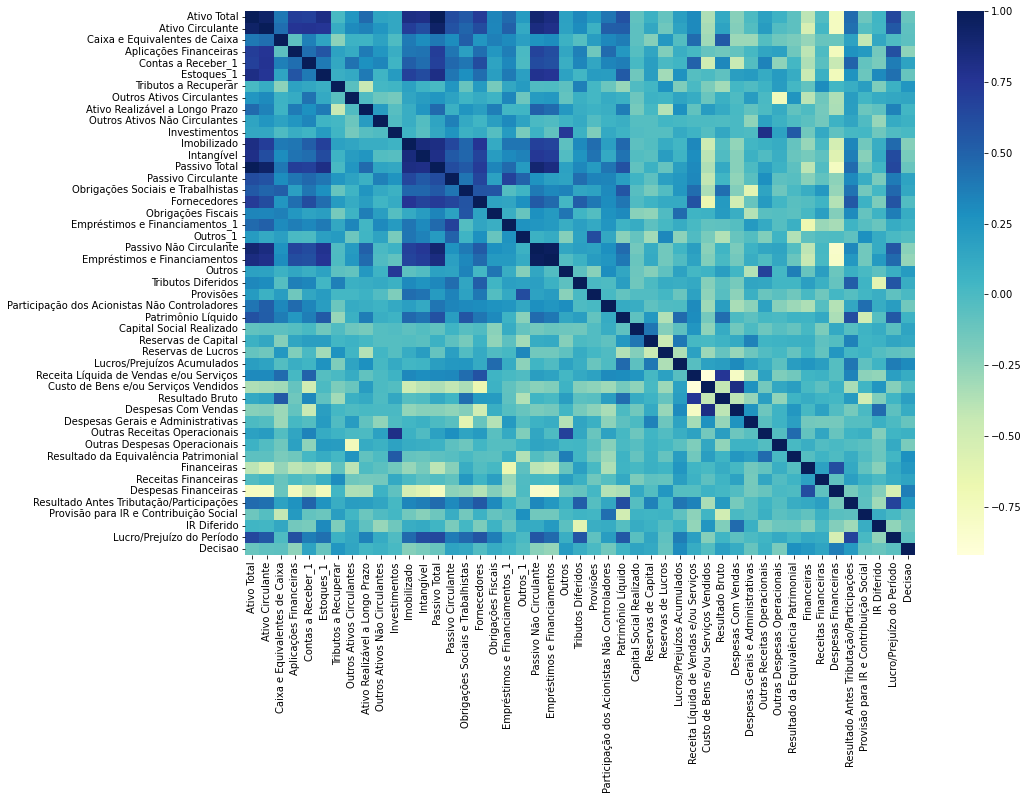

In [107]:
# Fazendo o gráfico de correlação com JBSS3

correlacoes = fundamentos["JBSS3"].corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlacoes, cmap="YlGnBu", ax=ax)

### Unificando o dataframe

In [108]:
copia_fundamentos = fundamentos.copy()

In [109]:
base_dados = pd.DataFrame()
for empresa in copia_fundamentos:
    copia_fundamentos[empresa] = copia_fundamentos[empresa][1:-1]
    copia_fundamentos[empresa] = copia_fundamentos[empresa].reset_index(drop=True)
    base_dados = base_dados.append(copia_fundamentos[empresa])
display(base_dados)

Ativo Total  Ativo Circulante  Caixa e Equivalentes de Caixa  \
0            -0                 0                              1   
1            43               154                             59   
2             0                 0                              0   
3             0                 1                              1   
4            -0                -0                             -0   
..          ...               ...                            ...   
26            0                 0                             -0   
27           -0                -0                              0   
28            0                 1                             -0   
29            0                -0                              1   
30            0                -0                              0   

    Aplicações Financeiras  Contas a Receber_1  Estoques_1  \
0                        0                  -1           0   
1                        1                 895           1   
2                        0                  -0          -0   
3                       -1                   0           0   
4                        0                  -0           0   
..                     ...                 ...         ...   
26                       0                  -0           0   
27                      -0                   0           0   
28                       3                  -0           0   
29                      -0                   0           0   
30                       0                  -0           0   

    Tributos a Recuperar  Outros Ativos Circulantes  \
0                     -1                          0   
1                   3041                          1   
2                      0                          0   
3                      1                          0   
4                      0                          0   
..                   ...                        ...   
26                     0                         -0   
27                     0                          0   
28                     0                          0   
29                     0                          0   
30                     0                          0   

    Ativo Realizável a Longo Prazo  Outros Ativos Não Circulantes  ...  \
0                                1                              0  ...   
1                                2                              1  ...   
2                               -0                              0  ...   
3                               -0                              0  ...   
4                               -0                             -0  ...   
..                             ...                            ...  ...   
26                               0                              0  ...   
27                              -0                              0  ...   
28                               0                              0  ...   
29                               0                              0  ...   
30                               0                              0  ...   

    Outras Despesas Operacionais  Resultado da Equivalência Patrimonial  \
0                              0                                      0   
1                           -281                                      1   
2                              0                                     39   
3                             -4                                      1   
4                              1                                      0   
..                           ...                                    ...   
26                             0                                      0   
27                             1                                      0   
28                            -1                                      0   
29                           -14                                      0   
30                             1                                   

### Análise Exploratória com os dados unificados

#### 1. Quantidade de Respostas em cada Tipo de Decisão com modelo Dummy

In [110]:
display(base_dados['Decisao'].value_counts(normalize=True).map("{:.1%}".format))
fig = px.histogram(base_dados, x="Decisao", color="Decisao")
fig.show()

2    50.1%
0    43.7%
1     6.2%
Name: Decisao, dtype: object

In [111]:
# vou tirar a categoria 1 e transformar em 0
base_dados.loc[base_dados["Decisao"]==1, "Decisao"] = 0
display(base_dados['Decisao'].value_counts(normalize=True).map("{:.1%}".format))
fig = px.histogram(base_dados, x="Decisao", color="Decisao")
fig.show()

2    50.1%
0    49.9%
Name: Decisao, dtype: object

#### 2. Correlação de todos os dados

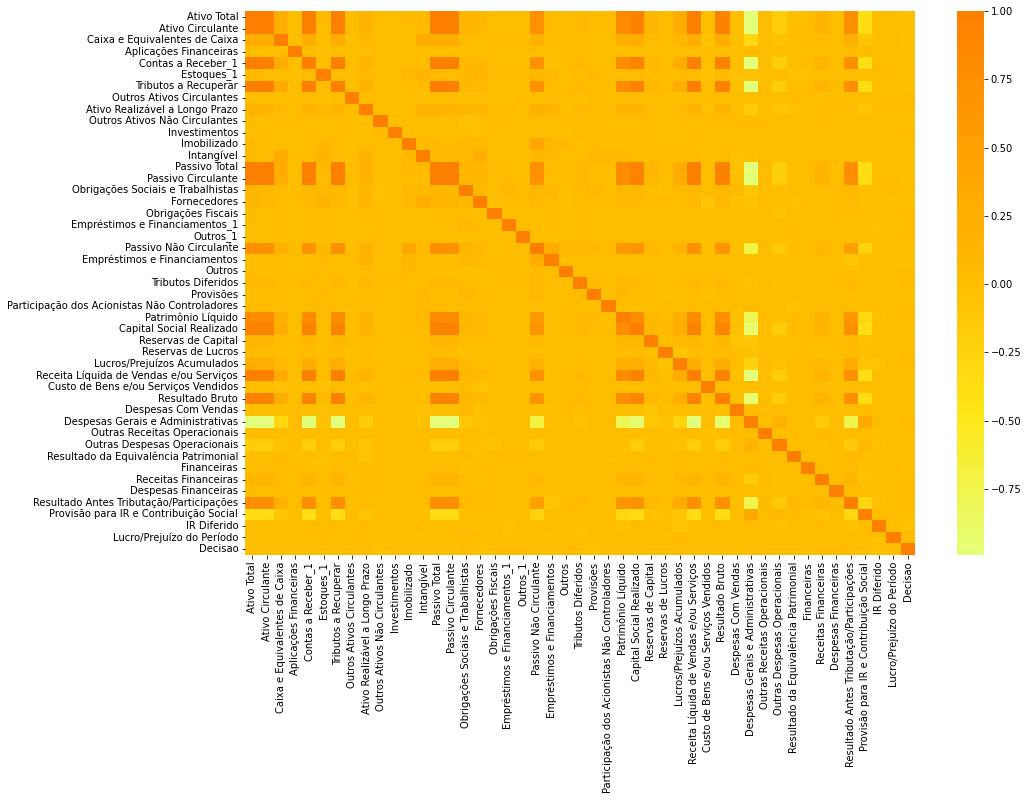

Ativo Total  Ativo Circulante  \
Ativo Total                                              1                 1   
Ativo Circulante                                         1                 1   
Caixa e Equivalentes de Caixa                            0                 0   
Aplicações Financeiras                                   0                 0   
Contas a Receber_1                                       1                 1   
Estoques_1                                               0                 0   
Tributos a Recuperar                                     1                 1   
Outros Ativos Circulantes                               -0                -0   
Ativo Realizável a Longo Prazo                           0                 0   
Outros Ativos Não Circulantes                            0                 0   
Investimentos                                           -0                -0   
Imobilizado                                              0                 0   
Intangível                                               0                 0   
Passivo Total                                            1                 1   
Passivo Circulante                                       1                 1   
Obrigações Sociais e Trabalhistas                        0                 0   
Fornecedores                                             0                 0   
Obrigações Fiscais                                       0                 0   
Empréstimos e Financiamentos_1                           0                 0   
Outros_1                                                 0                 0   
Passivo Não Circulante                                   1                 1   
Empréstimos e Financiamentos                             0                 0   
Outros                                                   0                -0   
Tributos Diferidos                                       0                 0   
Provisões                                                0                 0   
Participação dos Acionistas Não Controladores            0                 0   
Patrimônio Líquido                                       1                 1   
Capital Social Realizado                                 1                 1   
Reservas de Capital                                      0                 0   
Reservas de Lucros                                       0                 0   
Lucros/Prejuízos Acumulados                              0                 0   
Receita Líquida de Vendas e/ou Serviços                  1                 1   
Custo de Bens e/ou Serviços Vendidos                    -0                -0   
Resultado Bruto                                          1                 1   
Despesas Com Vendas                                     -0                -0   
Despesas Gerais e Administrativas                       -1                -1   
Outras Receitas Operacionais                            -0                -0   
Outras Despesas Operacionais                            -0                -0   
Resultado da Equivalência Patrimonial                   -0                 0   
Financeiras                                             -0                -0   
Receitas Financeiras                                     0                 0   
Despesas Financeiras                                     0                 0   
Resultado Antes Tributação/Participações                 1                 1   
Provisão para IR e Contribuição Social                  -0                -0   
IR Diferido                                             -0                -0   
Lucro/Prejuízo do Período                                0                 0   
Decisao                                                 -0                -0   

                                               Caixa e Equivalentes de Caixa  \
Ativo Total                                                                0   
Ativo Circulante                              

In [112]:
correlacoes = base_dados.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlacoes, cmap="Wistia", ax=ax)
plt.show()
display(correlacoes)

In [113]:
pd.set_option('float_format','{:.2f}'.format)

correlacao_pos = base_dados.corr().unstack()
correlacao_pos = correlacao_pos[correlacao_pos>=0.6]
correlacao_pos

Ativo Total                               Ativo Total                                1.00
                                          Ativo Circulante                           0.99
                                          Contas a Receber_1                         0.99
                                          Tributos a Recuperar                       0.99
                                          Passivo Total                              1.00
                                                                                     ... 
Resultado Antes Tributação/Participações  Resultado Antes Tributação/Participações   1.00
Provisão para IR e Contribuição Social    Provisão para IR e Contribuição Social     1.00
IR Diferido                               IR Diferido                                1.00
Lucro/Prejuízo do Período                 Lucro/Prejuízo do Período                  1.00
Decisao                                   Decisao                                    1.00
Length: 17

#### Vamos remover Todas as Colunas "já explicadas" pelo Ativo Total

In [114]:
correlacoes_encontradas = []
for coluna in correlacoes:
    for linha in correlacoes.index:
        if linha != coluna:
            valor = abs(correlacoes.loc[linha, coluna])
            if valor > 0.8 and (coluna, linha, valor) not in correlacoes_encontradas:
                correlacoes_encontradas.append((linha, coluna, valor))
                print(f"Correlação Encontrada: {linha} e {coluna}. Valor: {valor}")

Correlação Encontrada: Ativo Circulante e Ativo Total. Valor: 0.9936191613034182
Correlação Encontrada: Contas a Receber_1 e Ativo Total. Valor: 0.9897313992744241
Correlação Encontrada: Tributos a Recuperar e Ativo Total. Valor: 0.9911861955025305
Correlação Encontrada: Passivo Total e Ativo Total. Valor: 1.0
Correlação Encontrada: Passivo Circulante e Ativo Total. Valor: 0.9856898107136653
Correlação Encontrada: Patrimônio Líquido e Ativo Total. Valor: 0.8121568265673584
Correlação Encontrada: Capital Social Realizado e Ativo Total. Valor: 0.9407784719550619
Correlação Encontrada: Receita Líquida de Vendas e/ou Serviços e Ativo Total. Valor: 0.991369135249478
Correlação Encontrada: Resultado Bruto e Ativo Total. Valor: 0.9357493661129012
Correlação Encontrada: Despesas Gerais e Administrativas e Ativo Total. Valor: 0.9844249841100213
Correlação Encontrada: Contas a Receber_1 e Ativo Circulante. Valor: 0.9951703200197722
Correlação Encontrada: Tributos a Recuperar e Ativo Circulante. 

In [115]:
remover = ['Ativo Circulante', 'Contas a Receber_1', 'Tributos a Recuperar', 'Passivo Total', 'Passivo Circulante', 'Patrimônio Líquido', 'Capital Social Realizado', 'Receita Líquida de Vendas e/ou Serviços', 'Resultado Bruto', 'Despesas Gerais e Administrativas']
base_dados = base_dados.drop(remover, axis=1)

In [116]:
print(base_dados.shape)

(1882, 37)


### Vamos partir para Feature Selection com o algoritmo ExtraTreesClassifier

Estamos usando a variável target a Decisão para entender quais features são as mais importante para este modelo


In [117]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(random_state=1)
x = base_dados.drop("Decisao", axis=1)
y = base_dados["Decisao"]
modelo.fit(x, y)

caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)
display(caracteristicas_importantes)
top10 = list(caracteristicas_importantes.index)[:10]
print(top10)

0
Obrigações Fiscais                            0.03
Fornecedores                                  0.03
Outros Ativos Circulantes                     0.03
Lucros/Prejuízos Acumulados                   0.03
Resultado Antes Tributação/Participações      0.03
Obrigações Sociais e Trabalhistas             0.03
Ativo Total                                   0.03
Custo de Bens e/ou Serviços Vendidos          0.03
Caixa e Equivalentes de Caixa                 0.03
Resultado da Equivalência Patrimonial         0.03
Receitas Financeiras                          0.03
Despesas Financeiras                          0.03
Imobilizado                                   0.03
Ativo Realizável a Longo Prazo                0.03
Outros                                        0.03
Tributos Diferidos                            0.03
Outros Ativos Não Circulantes                 0.03
Provisões                                     0.03
IR Diferido                                   0.03
Passivo Não Circulante                        0.03
Estoques_1                                    0.03
Empréstimos e Financiamentos_1                0.03
Intangível                                    0.03
Lucro/Prejuízo do Período                     0.03
Despesas Com Vendas                           0.03
Investimentos                                 0.03
Aplicações Financeiras                        0.03
Outras Receitas Operacionais                  0.03
Participação dos Acionistas Não Controladores 0.03
Provisão para IR e Contribuição Social        0.03
Outros_1                                      0.03
Empréstimos e Financiamentos                  0.03
Reservas de Lucros                            0.03
Outras Despesas Operacionais                  0.02
Reservas de Capital                           0.02
Financeiras                                   0.02

['Obrigações Fiscais', 'Fornecedores', 'Outros Ativos Circulantes', 'Lucros/Prejuízos Acumulados', 'Resultado Antes Tributação/Participações', 'Obrigações Sociais e Trabalhistas', 'Ativo Total', 'Custo de Bens e/ou Serviços Vendidos', 'Caixa e Equivalentes de Caixa', 'Resultado da Equivalência Patrimonial']


### Aplicação do StandardScaler para normalizar os dados dos nossos modelos de MachineLearning

In [118]:
from sklearn.preprocessing import StandardScaler

def ajustar_scaler(tabela_original):
    scaler = StandardScaler()
    tabela_auxiliar = tabela_original.drop("Decisao", axis=1)
    
    tabela_auxiliar = pd.DataFrame(scaler.fit_transform(tabela_auxiliar), tabela_auxiliar.index, tabela_auxiliar.columns)
    tabela_auxiliar["Decisao"] = tabela_original["Decisao"]
    return tabela_auxiliar

nova_base_dados = ajustar_scaler(base_dados)
top10.append("Decisao") 

nova_base_dados = nova_base_dados[top10].reset_index(drop=True)
display(nova_base_dados)

Obrigações Fiscais  Fornecedores  Outros Ativos Circulantes  \
0                  -0.05         -0.13                      -0.03   
1                   0.06          2.13                      -0.03   
2                  -0.06          0.16                      -0.03   
3                  -0.01          0.85                      -0.03   
4                  -0.06         -0.44                      -0.03   
...                  ...           ...                        ...   
1877               -0.05          0.22                      -0.03   
1878               -0.05         -0.35                      -0.03   
1879                0.02          0.64                      -0.03   
1880                0.02          0.63                      -0.03   
1881               -0.06         -0.19                      -0.03   

      Lucros/Prejuízos Acumulados  Resultado Antes Tributação/Participações  \
0                            0.19                                     -0.04   
1                           11.82                                     33.15   
2                            0.09                                      0.00   
3                           -0.46                                      0.18   
4                            0.19                                     -0.12   
...                           ...                                       ...   
1877                        -0.02                                     -0.07   
1878                        -0.46                                     -0.12   
1879                         0.19                                      0.22   
1880                        -0.29                                     -0.18   
1881                         0.28                                      0.10   

      Obrigações Sociais e Trabalhistas  Ativo Total  \
0                                 -4.40        -0.06   
1                                  4.07        43.01   
2                                  0.63        -0.04   
3                                  1.24         0.10   
4                                 -1.28        -0.13   
...                                 ...          ...   
1877                               0.17        -0.02   
1878                              -1.72        -0.09   
1879                               1.09         0.33   
1880                               4.64         0.17   
1881                              -0.84        -0.04   

      Custo de Bens e/ou Serviços Vendidos  Caixa e Equivalentes de Caixa  \
0                                     0.03                           0.03   
1                                    -0.12                          11.79   
2                                     0.02                          -0.06   
3                                    -0.14                           0.19   
4                                     0.11                          -0.15   
...                                    ...                            ...   
1877                                  0.04                          -0.17   
1878                                  0.02                          -0.03   
1879                                  0.05                          -0.11   
1880                                 -0.01                           0.12   
1881                                  0.04                          -0.03   

      Resultado da Equivalência Patrimonial  Decisao  
0                                     -0.00        2  
1                                      0.12        0  
2                                      4.76        2  
3                                      0.11        2  
4                                      0.00        0  
...                                     ...      ...  
1877                                  -0.00        2  
1878                                  -0.00        0  
1879                                  -0.00        2  
1880                                  -0.00        0  
1881                     

### Separação dos dados em train e test

In [119]:
from sklearn.model_selection import train_test_split

x = nova_base_dados.drop("Decisao", axis=1)
y = nova_base_dados["Decisao"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=1)

### Criação de um Dummy Classifier

In [120]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

dummy = DummyClassifier(strategy="stratified", random_state=2)
dummy.fit(x_treino, y_treino)
previsao_dummy = dummy.predict(x_teste)

### Métricas de Avaliação

- Precisão vai ser nossa métrica principal
- Recall pode ser útil, mas precisão no caso de ações é mt mais importante.
- Accuracy que pode mensurar se o modelo está acertando os positivos reais x positivos preditos

Dummy
              precision    recall  f1-score   support

           0       0.47      0.50      0.49       231
           2       0.49      0.46      0.48       240

    accuracy                           0.48       471
   macro avg       0.48      0.48      0.48       471
weighted avg       0.48      0.48      0.48       471



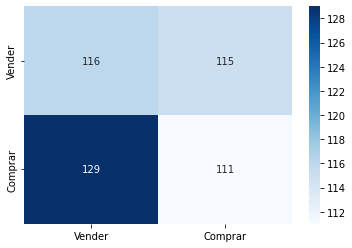

##################################################


In [121]:
def avaliar(y_teste, previsoes, nome_modelo):
    print(nome_modelo)
    report = classification_report(y_teste, previsoes)
    print(report)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index=["Vender", "Comprar"], columns=["Vender", "Comprar"])
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt=',')
    plt.show()
    print("#" * 50)
    
    
avaliar(y_teste, previsao_dummy, "Dummy")

### Modelos que vamos testar
- AdaBoost
- Catboost
- Decision Tree
- Random Forest
- ExtraTree
- Gradient Boost
- K Nearest Neighbors (KNN)
- Logistic Regression
- Naive Bayes
- Support Vector Machine (SVM)
- Rede Neural

In [122]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier


modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Catboost": CatBoostClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost": GradientBoostingClassifier(random_state=1),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=1),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(random_state=1),
    "RedeNeural": MLPClassifier(random_state=1, max_iter=400),
}

AdaBoost
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       231
           2       0.55      0.54      0.54       240

    accuracy                           0.54       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.54      0.54      0.54       471



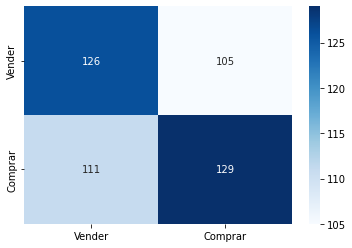

##################################################
Learning rate set to 0.011934
0:	learn: 0.6925237	total: 137ms	remaining: 2m 17s
1:	learn: 0.6919015	total: 140ms	remaining: 1m 9s
2:	learn: 0.6908910	total: 142ms	remaining: 47.4s
3:	learn: 0.6900102	total: 145ms	remaining: 36.1s
4:	learn: 0.6891453	total: 147ms	remaining: 29.3s
5:	learn: 0.6885763	total: 150ms	remaining: 24.8s
6:	learn: 0.6879393	total: 152ms	remaining: 21.6s
7:	learn: 0.6870525	total: 154ms	remaining: 19.1s
8:	learn: 0.6862274	total: 157ms	remaining: 17.3s
9:	learn: 0.6855810	total: 160ms	remaining: 15.8s
10:	learn: 0.6850272	total: 162ms	remaining: 14.6s
11:	learn: 0.6843354	total: 165ms	remaining: 13.6s
12:	learn: 0.6837017	total: 167ms	remaining: 12.7s
13:	learn: 0.6829666	total: 170ms	remaining: 11.9s
14:	learn: 0.6824587	total: 172ms	remaining: 11.3s
15:	learn: 0.6816775	total: 175ms	remaining: 10.7s
16:	learn: 0.6808713	total: 177ms	remaining: 10.3s
17:	learn: 0.6802354	total: 180ms	remaining: 9.8s
18:	learn: 

204:	learn: 0.5904300	total: 644ms	remaining: 2.5s
205:	learn: 0.5901290	total: 646ms	remaining: 2.49s
206:	learn: 0.5896184	total: 649ms	remaining: 2.49s
207:	learn: 0.5892976	total: 652ms	remaining: 2.48s
208:	learn: 0.5890782	total: 655ms	remaining: 2.48s
209:	learn: 0.5887804	total: 659ms	remaining: 2.48s
210:	learn: 0.5883773	total: 661ms	remaining: 2.47s
211:	learn: 0.5880655	total: 665ms	remaining: 2.47s
212:	learn: 0.5878526	total: 667ms	remaining: 2.47s
213:	learn: 0.5874813	total: 670ms	remaining: 2.46s
214:	learn: 0.5871111	total: 674ms	remaining: 2.46s
215:	learn: 0.5869605	total: 677ms	remaining: 2.46s
216:	learn: 0.5866564	total: 680ms	remaining: 2.45s
217:	learn: 0.5863064	total: 683ms	remaining: 2.45s
218:	learn: 0.5859520	total: 687ms	remaining: 2.45s
219:	learn: 0.5855456	total: 691ms	remaining: 2.45s
220:	learn: 0.5851886	total: 694ms	remaining: 2.44s
221:	learn: 0.5848101	total: 696ms	remaining: 2.44s
222:	learn: 0.5844862	total: 705ms	remaining: 2.46s
223:	learn: 0

371:	learn: 0.5394108	total: 1.16s	remaining: 1.97s
372:	learn: 0.5392332	total: 1.17s	remaining: 1.96s
373:	learn: 0.5388531	total: 1.17s	remaining: 1.96s
374:	learn: 0.5385834	total: 1.17s	remaining: 1.95s
375:	learn: 0.5383621	total: 1.18s	remaining: 1.95s
376:	learn: 0.5381234	total: 1.18s	remaining: 1.95s
377:	learn: 0.5379236	total: 1.18s	remaining: 1.94s
378:	learn: 0.5376303	total: 1.18s	remaining: 1.94s
379:	learn: 0.5374427	total: 1.19s	remaining: 1.93s
380:	learn: 0.5372607	total: 1.19s	remaining: 1.93s
381:	learn: 0.5369083	total: 1.19s	remaining: 1.93s
382:	learn: 0.5365640	total: 1.19s	remaining: 1.92s
383:	learn: 0.5362175	total: 1.2s	remaining: 1.92s
384:	learn: 0.5359463	total: 1.2s	remaining: 1.92s
385:	learn: 0.5354839	total: 1.2s	remaining: 1.91s
386:	learn: 0.5353013	total: 1.2s	remaining: 1.91s
387:	learn: 0.5348804	total: 1.21s	remaining: 1.9s
388:	learn: 0.5345705	total: 1.21s	remaining: 1.9s
389:	learn: 0.5344089	total: 1.21s	remaining: 1.9s
390:	learn: 0.53411

569:	learn: 0.4880713	total: 1.68s	remaining: 1.27s
570:	learn: 0.4879669	total: 1.69s	remaining: 1.27s
571:	learn: 0.4876232	total: 1.69s	remaining: 1.26s
572:	learn: 0.4872352	total: 1.69s	remaining: 1.26s
573:	learn: 0.4870103	total: 1.69s	remaining: 1.26s
574:	learn: 0.4867267	total: 1.7s	remaining: 1.25s
575:	learn: 0.4863298	total: 1.7s	remaining: 1.25s
576:	learn: 0.4861209	total: 1.7s	remaining: 1.25s
577:	learn: 0.4857989	total: 1.71s	remaining: 1.25s
578:	learn: 0.4855960	total: 1.71s	remaining: 1.24s
579:	learn: 0.4853106	total: 1.71s	remaining: 1.24s
580:	learn: 0.4851162	total: 1.71s	remaining: 1.24s
581:	learn: 0.4849605	total: 1.72s	remaining: 1.23s
582:	learn: 0.4847166	total: 1.72s	remaining: 1.23s
583:	learn: 0.4845751	total: 1.72s	remaining: 1.23s
584:	learn: 0.4843642	total: 1.72s	remaining: 1.22s
585:	learn: 0.4841766	total: 1.73s	remaining: 1.22s
586:	learn: 0.4838686	total: 1.73s	remaining: 1.22s
587:	learn: 0.4835964	total: 1.73s	remaining: 1.21s
588:	learn: 0.4

775:	learn: 0.4405526	total: 2.2s	remaining: 636ms
776:	learn: 0.4402647	total: 2.21s	remaining: 633ms
777:	learn: 0.4400430	total: 2.21s	remaining: 630ms
778:	learn: 0.4398772	total: 2.21s	remaining: 627ms
779:	learn: 0.4397190	total: 2.21s	remaining: 624ms
780:	learn: 0.4394520	total: 2.22s	remaining: 621ms
781:	learn: 0.4391850	total: 2.22s	remaining: 619ms
782:	learn: 0.4390825	total: 2.22s	remaining: 616ms
783:	learn: 0.4389040	total: 2.22s	remaining: 613ms
784:	learn: 0.4387454	total: 2.23s	remaining: 610ms
785:	learn: 0.4386531	total: 2.23s	remaining: 607ms
786:	learn: 0.4384231	total: 2.23s	remaining: 604ms
787:	learn: 0.4381505	total: 2.23s	remaining: 601ms
788:	learn: 0.4378747	total: 2.24s	remaining: 598ms
789:	learn: 0.4376764	total: 2.24s	remaining: 595ms
790:	learn: 0.4373318	total: 2.24s	remaining: 592ms
791:	learn: 0.4372244	total: 2.24s	remaining: 589ms
792:	learn: 0.4368590	total: 2.25s	remaining: 587ms
793:	learn: 0.4365877	total: 2.25s	remaining: 584ms
794:	learn: 0

933:	learn: 0.4046371	total: 2.58s	remaining: 182ms
934:	learn: 0.4044338	total: 2.58s	remaining: 179ms
935:	learn: 0.4042095	total: 2.58s	remaining: 177ms
936:	learn: 0.4039717	total: 2.58s	remaining: 174ms
937:	learn: 0.4037729	total: 2.59s	remaining: 171ms
938:	learn: 0.4035599	total: 2.59s	remaining: 168ms
939:	learn: 0.4034849	total: 2.59s	remaining: 166ms
940:	learn: 0.4032232	total: 2.6s	remaining: 163ms
941:	learn: 0.4029764	total: 2.6s	remaining: 160ms
942:	learn: 0.4027107	total: 2.6s	remaining: 157ms
943:	learn: 0.4025102	total: 2.6s	remaining: 154ms
944:	learn: 0.4022125	total: 2.6s	remaining: 152ms
945:	learn: 0.4020190	total: 2.61s	remaining: 149ms
946:	learn: 0.4018663	total: 2.61s	remaining: 146ms
947:	learn: 0.4015855	total: 2.61s	remaining: 143ms
948:	learn: 0.4013386	total: 2.61s	remaining: 141ms
949:	learn: 0.4010913	total: 2.62s	remaining: 138ms
950:	learn: 0.4009132	total: 2.62s	remaining: 135ms
951:	learn: 0.4006656	total: 2.62s	remaining: 132ms
952:	learn: 0.400

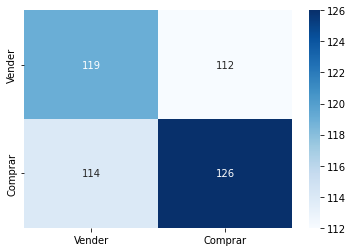

##################################################
DecisionTree
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       231
           2       0.52      0.53      0.53       240

    accuracy                           0.51       471
   macro avg       0.51      0.51      0.51       471
weighted avg       0.51      0.51      0.51       471



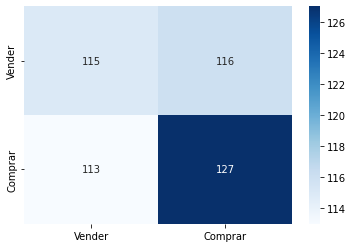

##################################################
RandomForest
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       231
           2       0.57      0.53      0.55       240

    accuracy                           0.55       471
   macro avg       0.55      0.55      0.55       471
weighted avg       0.55      0.55      0.55       471



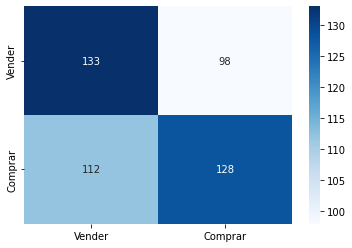

##################################################
ExtraTree
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       231
           2       0.57      0.53      0.55       240

    accuracy                           0.55       471
   macro avg       0.55      0.55      0.55       471
weighted avg       0.55      0.55      0.55       471



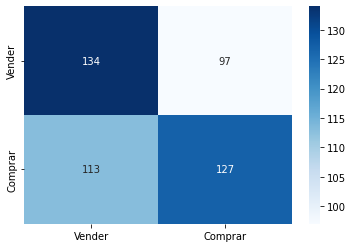

##################################################
GradientBoost
              precision    recall  f1-score   support

           0       0.52      0.51      0.51       231
           2       0.54      0.55      0.55       240

    accuracy                           0.53       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.53      0.53      0.53       471



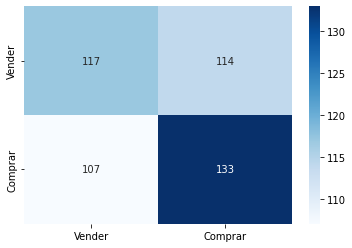

##################################################
KNN
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       231
           2       0.55      0.60      0.57       240

    accuracy                           0.54       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.54      0.54      0.54       471



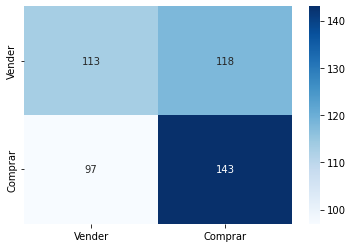

##################################################
LogisticRegression
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       231
           2       0.53      0.50      0.51       240

    accuracy                           0.52       471
   macro avg       0.52      0.52      0.52       471
weighted avg       0.52      0.52      0.52       471



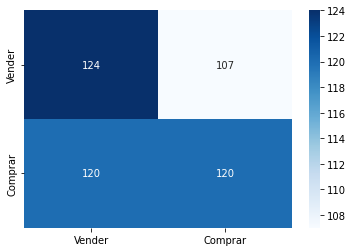

##################################################
NaiveBayes
              precision    recall  f1-score   support

           0       0.48      0.89      0.63       231
           2       0.46      0.09      0.15       240

    accuracy                           0.48       471
   macro avg       0.47      0.49      0.39       471
weighted avg       0.47      0.48      0.39       471



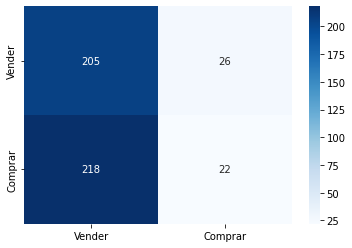

##################################################
SVM
              precision    recall  f1-score   support

           0       0.51      0.74      0.60       231
           2       0.56      0.33      0.42       240

    accuracy                           0.53       471
   macro avg       0.54      0.53      0.51       471
weighted avg       0.54      0.53      0.51       471



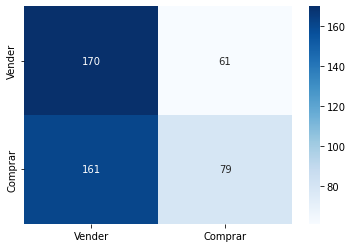

##################################################
RedeNeural
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       231
           2       0.57      0.58      0.57       240

    accuracy                           0.56       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.56      0.56      0.56       471



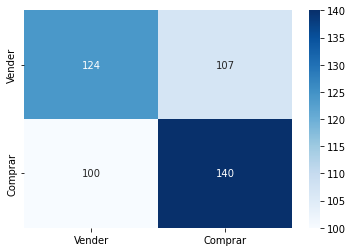

##################################################


In [123]:
for nome_modelo in modelos:
    modelo = modelos[nome_modelo]
    modelo.fit(x_treino, y_treino)
    previsoes = modelo.predict(x_teste)
    avaliar(y_teste, previsoes, nome_modelo)
    modelos[nome_modelo] = modelo

# Pycaret para re-validar os algoritmos acima


In [ ]:

from pycaret.utils import version
version()

In [53]:
from pycaret import classification

In [54]:
# Pycaret para re-validar os algoritmos acima

classificador = classification.setup(data=nova_base_dados,
                     target='Decisao',
                     session_id=123)

create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Decisao',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                

In [64]:
melhores_modelos = classification.compare_models()

create_model_container: 62
master_model_container: 62
display_container: 7
compare_models() succesfully completed......................................


In [57]:
type(melhores_modelos[0])

catboost.core.CatBoostClassifier

In [63]:
# Criando o modelo
classification_dt = classification.create_model('catboost')

create_model_container: 47
master_model_container: 47
display_container: 6
create_model() succesfully completed......................................


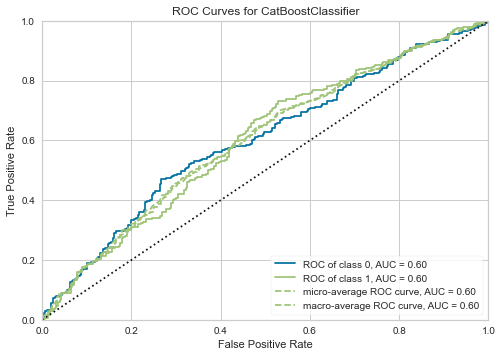

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [66]:
# Gráfico AUC=ROC
classification.plot_model(classification_dt,plot='auc')

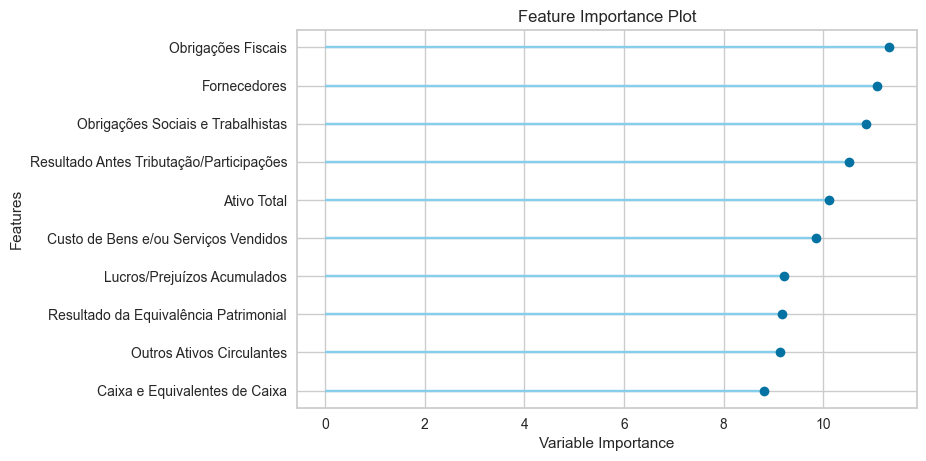

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [68]:
# importancia das variaveis
classification.plot_model(classification_dt, plot='feature')

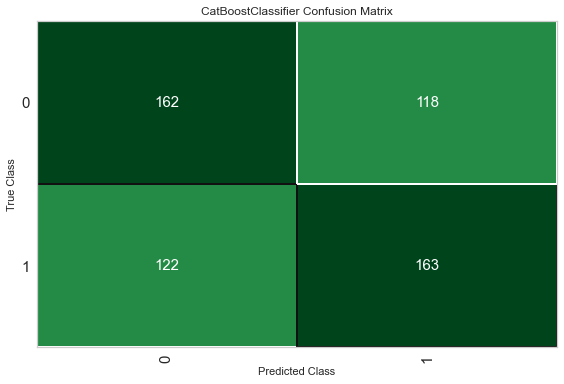

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [69]:
plot_model(best, plot = 'confusion_matrix')

In [71]:
tuned_ct = tune_model(classification_dt, optimize = 'Accuracy')

create_model_container: 63
master_model_container: 63
display_container: 8
tune_model() succesfully completed......................................


### Agora vamos ao tunning do modelo

- é bom sempre incluir no tuning os parâmetros "padrões" do modelo, se não pode ser que você encontre somente resultados piores

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

modelo_final = modelos["RandomForest"]

n_estimators = range(10, 251, 30)
max_features = list(range(2, 11, 2))
max_features.append('auto')
min_samples_split = range(2, 11, 2)

precision2_score = make_scorer(precision_score, labels=[2], average='macro')

grid = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators': n_estimators,
            'max_features': max_features,
            'min_samples_split': min_samples_split,
            'random_state': [1],
        },
        scoring=precision2_score,
)

resultado_grid = grid.fit(x_treino, y_treino)
print("Ajuste feito")

Ajuste feito


In [125]:
grid

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6, 8, 10, 'auto'],
                         'min_samples_split': range(2, 11, 2),
                         'n_estimators': range(10, 251, 30),
                         'random_state': [1]},
             scoring=make_scorer(precision_score, labels=[2], average=macro))

In [127]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=100,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    x_treino, y_treino,
    #cat_features=cat_features,
    eval_set=(x_teste, y_teste),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [128]:
from catboost import CatBoostClassifier
#from sklearn.model_selection import train_test_split

#x = nova_base_dados.drop("Decisao", axis=1)
#y = nova_base_dados["Decisao"]

#x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=1)
categorial_features_indices = np.where(x.dtypes != np.float)[0]
#Criando a máquina

model = CatBoostClassifier(iterations = 200, depth=3,learning_rate=0.1,loss_function='MultiClass')

model.fit(x_treino,y_treino,
        cat_features = categorial_features_indices,
         eval_set=(x_teste,y_teste),plot=True)

C:\Users\Homero\AppData\Local\Temp/ipykernel_10480/915038987.py:8: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6910347	test: 0.6919553	best: 0.6919553 (0)	total: 1.29ms	remaining: 257ms
1:	learn: 0.6893342	test: 0.6907040	best: 0.6907040 (1)	total: 2.32ms	remaining: 230ms
2:	learn: 0.6884497	test: 0.6903933	best: 0.6903933 (2)	total: 3.32ms	remaining: 218ms
3:	learn: 0.6864875	test: 0.6896797	best: 0.6896797 (3)	total: 4.45ms	remaining: 218ms
4:	learn: 0.6862495	test: 0.6899737	best: 0.6896797 (3)	total: 5.74ms	remaining: 224ms
5:	learn: 0.6848809	test: 0.6893734	best: 0.6893734 (5)	total: 6.95ms	remaining: 225ms
6:	learn: 0.6826575	test: 0.6902052	best: 0.6893734 (5)	total: 8.18ms	remaining: 226ms
7:	learn: 0.6814380	test: 0.6895390	best: 0.6893734 (5)	total: 9.29ms	remaining: 223ms
8:	learn: 0.6804010	test: 0.6891999	best: 0.6891999 (8)	total: 10.5ms	remaining: 222ms
9:	learn: 0.6794535	test: 0.6886409	best: 0.6886409 (9)	total: 11.6ms	remaining: 221ms
10:	learn: 0.6779423	test: 0.6894084	best: 0.6886409 (9)	total: 13ms	remaining: 223ms
11:	learn: 0.6768317	test: 0.6899859	best: 0

151:	learn: 0.5937996	test: 0.6923479	best: 0.6862263 (39)	total: 163ms	remaining: 51.3ms
152:	learn: 0.5935211	test: 0.6923658	best: 0.6862263 (39)	total: 164ms	remaining: 50.3ms
153:	learn: 0.5932496	test: 0.6920987	best: 0.6862263 (39)	total: 165ms	remaining: 49.2ms
154:	learn: 0.5928885	test: 0.6918950	best: 0.6862263 (39)	total: 166ms	remaining: 48.2ms
155:	learn: 0.5924363	test: 0.6919357	best: 0.6862263 (39)	total: 167ms	remaining: 47.1ms
156:	learn: 0.5919147	test: 0.6918098	best: 0.6862263 (39)	total: 168ms	remaining: 46.1ms
157:	learn: 0.5914156	test: 0.6922097	best: 0.6862263 (39)	total: 169ms	remaining: 45ms
158:	learn: 0.5910216	test: 0.6918241	best: 0.6862263 (39)	total: 170ms	remaining: 43.9ms
159:	learn: 0.5903886	test: 0.6921981	best: 0.6862263 (39)	total: 172ms	remaining: 42.9ms
160:	learn: 0.5897641	test: 0.6919757	best: 0.6862263 (39)	total: 173ms	remaining: 41.8ms
161:	learn: 0.5892276	test: 0.6915802	best: 0.6862263 (39)	total: 174ms	remaining: 40.8ms
162:	learn: 

In [129]:
best_model = model.get_best_iteration()
#print(model.get_best_iteration())
best_model

39

Catboost Tunado
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       231
           2       0.57      0.55      0.56       240

    accuracy                           0.56       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.56      0.56      0.56       471



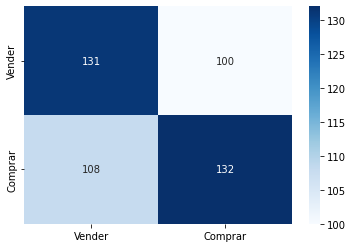

##################################################


In [130]:
modelo_tunado = resultado_grid.best_estimator_
previsoes = modelo_tunado.predict(x_teste)
avaliar(y_teste, previsoes, "Catboost Tunado")

### Vamos seguir então com o Modelo RandomForest tunado para ser o nosso modelo

- Agora ao que interessa...será que vamos conseguir escolher boas ações e ter uma carteira rentável?
- Para isso, temos que pegar o último Trimestre (que não usamos para treinar o modelo nem testar) e ver como ele teria saído até o momento em que gravo esse vídeo...

### Repetindo os passos com a base fundamentos só que pegando apenas o último tri de cada empresa

In [187]:
fundamentos

{'ABEV3':             Ativo Total  Ativo Circulante  Caixa e Equivalentes de Caixa  \
 2012-12-31         0.00              0.00                           0.00   
 2013-03-31        -0.00              0.08                           0.54   
 2013-06-30        42.82            154.47                          59.40   
 2013-09-30         0.01              0.03                           0.08   
 2013-12-31         0.15              0.64                           1.33   
 2014-03-31        -0.08             -0.20                          -0.35   
 2014-06-30        -0.00             -0.04                          -0.14   
 2014-09-30         0.03             -0.02                          -0.08   
 2014-12-31         0.11              0.34                           0.69   
 2015-03-31         0.04             -0.07                          -0.28   
 2015-06-30        -0.01             -0.05                          -0.01   
 2015-09-30         0.18              0.30                         

In [188]:
tri1_2021_fundamentos = fundamentos.copy()
tri1_2021_base_dados = pd.DataFrame()
lista_empresas = []
for empresa in tri1_2021_fundamentos:
    tri1_2021_fundamentos[empresa] = tri1_2021_fundamentos[empresa][-1:]
    tri1_2021_fundamentos[empresa] = tri1_2021_fundamentos[empresa].reset_index(drop=True)
    tri1_2021_base_dados = tri1_2021_base_dados.append(tri1_2021_fundamentos[empresa])
    lista_empresas.append(empresa)
display(tri1_2021_base_dados)
print(lista_empresas)

Ativo Total  Ativo Circulante  Caixa e Equivalentes de Caixa  \
0         -0.01             -0.10                          -0.21   
0          0.02              0.06                           0.11   
0         -0.07             -0.09                          -0.05   
0          0.08              0.76                           3.91   
0         -0.03             -0.04                          -0.34   
..          ...               ...                            ...   
0          0.06              0.28                           0.40   
0         -0.00             -0.14                          -0.31   
0          0.10              0.08                           0.41   
0          0.05              0.08                           0.49   
0         -0.02             -0.09                           0.13   

    Aplicações Financeiras  Contas a Receber_1  Estoques_1  \
0                     0.18                0.04        0.04   
0                     0.05                0.19        0.00   
0                    -0.30                0.02       -0.10   
0                     0.00               -1.00        0.00   
0                     0.00                0.43        0.07   
..                     ...                 ...         ...   
0                     0.00                0.45       -0.14   
0                     0.00               -0.02        0.22   
0                     0.00                0.00        0.11   
0                    -0.40               -0.04        0.04   
0                    -0.15                0.02        0.00   

    Tributos a Recuperar  Outros Ativos Circulantes  \
0                  -0.05                       0.46   
0                   0.10                      -0.60   
0                   0.04                      -0.20   
0                   0.00                       0.00   
0                   1.34                       0.47   
..                   ...                        ...   
0                  -0.01                       0.77   
0                  -0.13                      -0.06   
0                  -0.06                       0.03   
0                  -0.04                       0.20   
0                   0.00                       0.09   

    Ativo Realizável a Longo Prazo  Outros Ativos Não Circulantes  ...  \
0                             0.34                           0.00  ...   
0                             0.05                           0.00  ...   
0                             0.14                           0.00  ...   
0                             0.26                           0.00  ...   
0                            -0.03                           0.00  ...   
..                             ...                            ...  ...   
0                            -0.12                          -0.47  ...   
0                            -0.00                          -0.11  ...   
0                             0.22                           0.05  ...   
0                            -0.19                           0.00  ...   
0                            -0.10                           0.00  ...   

    Outras Despesas Operacionais  Resultado da Equivalência Patrimonial  \
0                          -2.20                                   0.14   
0                           0.81                                   0.24   
0                          -0.63                                   0.00   
0                        -213.76                                   2.02   
0                           0.82                                   0.00   
..                           ...                                    ...   
0                          -9.24                                  -6.94   
0                           0.27                                  -0.15   
0                          -0.56                                  -0.25   
0                          -0.28                                  -0.82   
0                           0.40                                   

['ABEV3', 'B3SA3', 'BEEF3', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CSAN3', 'CSNA3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HGTX3', 'HYPE3', 'IGTA3', 'ITSA4', 'JBSS3', 'JHSF3', 'LAME4', 'LCAM3', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR4', 'PRIO3', 'QUAL3', 'RADL3', 'RENT3', 'SBSP3', 'SULA11', 'SUZB3', 'TAEE11', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT3', 'VVAR3', 'WEGE3', 'YDUQ3']


In [189]:
tri1_2021_base_dados =tri1_2021_base_dados.reset_index(drop=True)
tri1_2021_base_dados = tri1_2021_base_dados[top10]
tri1_2021_base_dados = ajustar_scaler(tri1_2021_base_dados)
tri1_2021_base_dados = tri1_2021_base_dados.drop("Decisao", axis=1)
display(tri1_2021_base_dados)

Obrigações Fiscais  Fornecedores  Outros Ativos Circulantes  \
0                -0.13          0.09                       1.12   
1                -0.13          1.61                      -1.52   
2                -0.13         -0.46                      -0.52   
3                 7.75         -0.76                      -0.03   
4                -0.13         -0.22                       1.15   
..                 ...           ...                        ...   
56               -0.13         -0.76                       1.88   
57               -0.13         -0.91                      -0.18   
58               -0.13          0.06                       0.05   
59               -0.13         -0.73                       0.48   
60               -0.13         -0.19                       0.20   

    Lucros/Prejuízos Acumulados  Resultado Antes Tributação/Participações  \
0                         -0.79                                      1.27   
1                         -0.79                                     -0.38   
2                         -0.79                                     -0.16   
3                          3.13                                      0.91   
4                          0.71                                      0.01   
..                          ...                                       ...   
56                        -0.79                                     -0.90   
57                        -0.79                                     -0.34   
58                        -0.66                                     -1.06   
59                        -0.79                                     -0.33   
60                        -0.79                                     -1.08   

    Obrigações Sociais e Trabalhistas  Ativo Total  \
0                               -1.07        -0.63   
1                                0.22        -0.09   
2                                0.42        -1.41   
3                                0.22         0.78   
4                               -1.10        -0.86   
..                                ...          ...   
56                               1.22         0.51   
57                              -0.97        -0.48   
58                               1.14         1.12   
59                              -1.61         0.30   
60                              -1.67        -0.65   

    Custo de Bens e/ou Serviços Vendidos  Caixa e Equivalentes de Caixa  \
0                                   0.21                          -0.45   
1                                  -4.32                          -0.19   
2                                   0.16                          -0.32   
3                                   0.49                           2.81   
4                                   0.15                          -0.55   
..                                   ...                            ...   
56                                 -0.01                           0.04   
57                                  0.45                          -0.53   
58                                 -0.31                           0.04   
59                                  0.48                           0.10   
60                                 -0.02                          -0.18   

    Resultado da Equivalência Patrimonial  
0                                    0.16  
1                                    0.21  
2                                    0.08  
3                                    1.16  
4                                    0.08  
..                                    ...  
56                                  -3.62  
57                                  -0.00  
58                                  -0.05  
59                                  -0.36  
60                                   0.08  

[61 rows x 10 columns]

In [190]:
model

In [191]:
previsoes_tri1_2021 = model.predict(tri1_2021_base_dados)
print(previsoes_tri1_2021)

carteira = []
carteira_inicial = []

for i, empresa in enumerate(lista_empresas):
    if previsoes_tri1_2021[i] == 2:
        print(empresa)
        carteira_inicial.append(1000)
        cotacao = cotacoes[empresa]
        cotacao = cotacao.set_index("Date")
        cotacao_inicial = cotacao.loc["2020-12-31", "Adj Close"]
        cotacao_final = cotacao.loc["2021-03-31", "Adj Close"]
        percentual = cotacao_final / cotacao_inicial
        carteira.append(1000 * percentual)
        
saldo_inicial = sum(carteira_inicial)
saldo_final = sum(carteira)
print(saldo_inicial, saldo_final)
print(saldo_final / saldo_inicial)

[[2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]]
ABEV3
BRAP4
BRFS3
BRKM5
BRML3
CIEL3
CMIG4
CPFE3
CSAN3
CSNA3
EGIE3
ENBR3
ENEV3
EQTL3
FLRY3
ITSA4
JBSS3
LAME4
LCAM3
MRFG3
MRVE3
PCAR3
PETR4
PRIO3
QUAL3
SBSP3
SUZB3
USIM5
VALE3
WEGE3
30000 31139.70040287705
1.037990013429235


### Agora vamos comparar previsão de decisões com o IBOV

In [149]:
variacao_ibov = df_ibov.loc["2021-03-31", "IBOV"] / df_ibov.loc["2020-12-31", "IBOV"]
print(variacao_ibov)

0.9799776502516447


In [ ]:
# # armazenar a inteligencia artificial
# import joblib

# joblib.dump(modelo_tunado, "ia_carteiraacoes.joblib")

# modelo_tunado = joblib.load("ia_carteiraacoes.joblib")

In [ ]:
# Comparando resultados de 2020 a primeiro tri de 2021
- 1º tri 2021: 3.8%  x IBOV: -2.00%      - Performance frente IBOV: +5.8% - maior retorno frente IBOV
- 4º tri 2020: 14.55%  x IBOV: 25.80%    - Performance frente IBOV: -11.25% - menor retorno frente IBOV
- 3º tri 2020: -9.04%  x IBOV: -10.00%   - Performance frente IBOV: +0.96
- 2º tri 2020: 2
    ]7.33%  x IBOV: 30.44%    - Performance frente IBOV: -3.11
- 1º tri 2020: -25.63%  x IBOV: -30.32%  - Performance frente IBOV: +4.69

- Performance geral: 11.01% x IBOV: 13.92%
- Lucro caso colocar 1 Milhão de reais: R$ 110.100 x IBOV de R$ 139.200
- MAE de 5,16% frente o IBOV
- Podemos notar que em periodos de maior volatilidade a carteira perfoma melhor que o IBOV e o intuito é ter uma carteira de
menor risco e retorno positivo, logo podemos utilizar este algoritmo.

In [204]:
from sklearn.metrics import mean_absolute_error

y_true = [-2.00, 25.80, -10.00, 30.44,-30.32]
y_pred = [3.8, 14.55, -9.04,27.33,-25.63]

mean_absolute_error(y_true, y_pred)

5.162000000000001